In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('customer_churn_data.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isna().sum().sum()

np.int64(297)

In [6]:
df['InternetService'] = df['InternetService'].fillna('')

In [7]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_columns_data = df.select_dtypes(include={"number"})

In [12]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [13]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


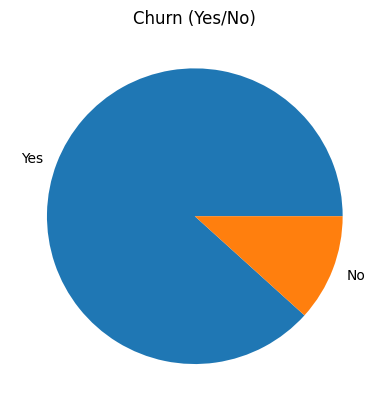

In [14]:
df['Churn'].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [15]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [16]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [18]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

At The Lower terms we can see that the monthly charges average  decrease

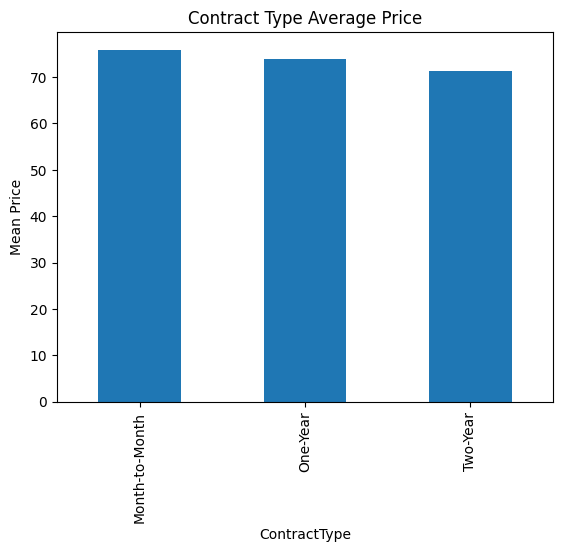

In [19]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("ContractType")
plt.title("Contract Type Average Price")
plt.show()

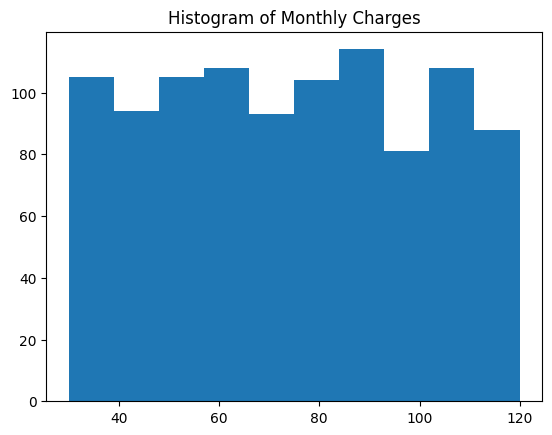

In [20]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

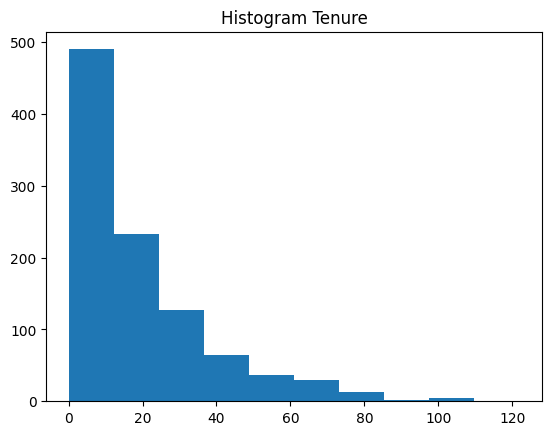

In [21]:
plt.hist(df['Tenure'])
plt.title("Histogram Tenure")
plt.show()



In [22]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [23]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [24]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [25]:
y = df[["Churn"]]
x = df[["Age","Gender","Tenure","MonthlyCharges"]]


In [26]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [27]:
x['Gender']= x['Gender'].apply(lambda x:1 if x == "Female" else 0)

C:\Users\Pratham\AppData\Local\Temp\ipykernel_21192\2293157660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender']= x['Gender'].apply(lambda x:1 if x == "Female" else 0)


In [28]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [29]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [30]:
type(x['Gender'][0])

numpy.int64

In [31]:
y['Churn']= y['Churn'].apply(lambda x:1 if x == "Yes" else 0)


C:\Users\Pratham\AppData\Local\Temp\ipykernel_21192\4047831790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn']= y['Churn'].apply(lambda x:1 if x == "Yes" else 0)


In [32]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [33]:
type(y['Churn'][0])

numpy.int64

In [34]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2)

In [36]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [37]:
scaler = StandardScaler()


In [38]:
x_train = scaler.fit_transform(x_train)

In [39]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [40]:
x_test = scaler.fit_transform(x_test)

In [41]:
from sklearn.metrics import accuracy_score
def modelperformance(predications):
    print("Accuracy score on model is {}".format(accuracy_score(y_test , predications)))

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_model = LogisticRegression()

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [48]:
y_pred = log_model.predict(x_test)

In [49]:
modelperformance(y_pred)

Accuracy score on model is 0.86


In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
param_grid ={
    'n_neighbors':[3,5,7,9],
    "weights":["unifrom","distance"]
}

In [52]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [53]:
gridkn.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['unifrom', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [54]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [55]:
y_pred = gridkn.predict(x_test)

In [56]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Correct the spelling of 'kernet' to 'kernel'
param_grid = { 
    'C': [0.01, 0.1, 0.5, 1], 
    'kernel': ['rbf', 'linear', 'poly'] 
} 

gridsvc = GridSearchCV(SVC(), param_grid, cv=5)
gridsvc.fit(x_train, y_train)


,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['rbf', 'linear', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [58]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [59]:
y_pred = gridsvc.predict(x_test)

In [60]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], # Corrected from 'min_sample_split'
    'min_samples_leaf': [1, 2, 4]    # Corrected from 'min_sample_leaf'
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
# Fit the model using the training features (x_train) and training targets (y_train)
grid_tree.fit(x_train, y_train)


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [62]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [63]:
y_pred = grid_tree.predict(x_test)

In [64]:
modelperformance(y_pred)

Accuracy score on model is 0.82


In [65]:
from sklearn.ensemble import RandomForestClassifier
rcf_model = RandomForestClassifier()

param_grid = {
    'n_estimators':[32,64,128,256],
    'max_features':[2,3,4],
    'bootstrap':[True,False]
}

grid_rfc = GridSearchCV(rcf_model,param_grid,cv=5)
grid_rfc.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,32


In [66]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32}

In [67]:
y_pred = grid_rfc.predict(x_test)

In [68]:
modelperformance(y_pred)

Accuracy score on model is 0.845


In [69]:
best_model=gridsvc.best_estimator_

In [70]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [71]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')